In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('csv\Cardiovascular_Disease_Risk_Dataset.csv', sep=';')
data.head()


,PARTICIPANT ID,SEX,AGE,WEIGHT,HEIGHT,BMI,ABDOMINAL CIRCUMFERENCE,BLOOD PRESSURE,TOTAL CHOLESTEROL,HDL,FASTING BLOOD SUGAR,SMOKING,CVD RISK
0,1,M,41,72.7,1.76,23.5,94.0,120.0,223,56,86,N,LOW
1,2,M,50,74.2,1.77,23.7,84.0,130.0,189,49,101,N,INTERMEDIARY
2,3,M,44,79.2,1.73,26.5,98.0,130.0,195,59,92,N,LOW
3,4,M,39,68.8,1.64,25.6,88.0,120.0,159,45,81,N,LOW
4,5,M,36,88.4,1.87,25.3,85.0,170.0,109,51,77,N,LOW


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PARTICIPANT ID           142 non-null    int64  
 1   SEX                      142 non-null    object 
 2   AGE                      142 non-null    int64  
 3   WEIGHT                   142 non-null    float64
 4   HEIGHT                   142 non-null    float64
 5   BMI                      142 non-null    float64
 6   ABDOMINAL CIRCUMFERENCE  139 non-null    float64
 7   BLOOD PRESSURE           141 non-null    float64
 8   TOTAL CHOLESTEROL        142 non-null    int64  
 9   HDL                      142 non-null    int64  
 10  FASTING BLOOD SUGAR      142 non-null    int64  
 11  SMOKING                  142 non-null    object 
 12  CVD RISK                 142 non-null    object 
dtypes: float64(5), int64(5), object(3)
memory usage: 14.5+ KB


In [4]:
data.SMOKING.value_counts()

SMOKING
N    120
Y     22
Name: count, dtype: int64

In [5]:
# data augmentation
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer


metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

# Create the synthesizer with metadata
model = CTGANSynthesizer(metadata)
model.fit(data)
synthetic_data = model.sample(10000)


c:\Python310\lib\site-packages\sdv\single_table\base.py:145: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Python310\lib\site-packages\sdv\single_table\base.py:123: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [6]:
synthetic_data

,PARTICIPANT ID,SEX,AGE,WEIGHT,HEIGHT,BMI,ABDOMINAL CIRCUMFERENCE,BLOOD PRESSURE,TOTAL CHOLESTEROL,HDL,FASTING BLOOD SUGAR,SMOKING,CVD RISK
0,57,F,35,75.4,1.68,23.9,106.0,120.0,175,53,96,Y,LOW
1,36,F,33,50.0,1.74,23.2,94.0,130.0,100,24,101,N,LOW
2,36,F,30,87.4,1.70,31.1,75.0,125.0,222,29,118,N,INTERMEDIARY
3,21,M,35,50.6,1.80,26.4,89.0,120.0,155,50,111,N,LOW
4,6,M,36,70.8,1.73,18.4,91.0,130.0,168,48,104,Y,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,23,M,34,56.7,1.75,25.0,82.0,120.0,214,29,89,N,LOW
9996,36,M,30,55.8,1.91,23.8,89.0,125.0,208,37,109,N,INTERMEDIARY
9997,91,M,31,48.8,1.72,21.7,90.0,100.0,207,41,114,N,LOW
9998,7,F,34,93.1,1.76,24.4,94.0,110.0,272,61,92,N,INTERMEDIARY


In [7]:
# data augmentation
from sdv.metadata import SingleTableMetadata
from sdv.multi_table.base import GaussianCopulaSynthesizer


metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data.drop('PARTICIPANT ID', axis=1))

# Create the synthesizer with metadata
model = GaussianCopulaSynthesizer(metadata, default_distribution='gaussian_kde')
model.fit(data.drop('PARTICIPANT ID', axis=1))
synthetic_data_gauss = model.sample(10000, max_tries_per_batch=300)

c:\Python310\lib\site-packages\sdv\single_table\base.py:145: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Python310\lib\site-packages\sdv\single_table\base.py:123: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [8]:
synthetic_data_gauss

,SEX,AGE,WEIGHT,HEIGHT,BMI,ABDOMINAL CIRCUMFERENCE,BLOOD PRESSURE,TOTAL CHOLESTEROL,HDL,FASTING BLOOD SUGAR,SMOKING,CVD RISK
0,M,46,64.8,1.61,24.8,84.0,130.0,208,47,89,N,INTERMEDIARY
1,M,39,63.9,1.69,22.2,92.0,130.0,203,54,92,N,LOW
2,M,53,56.3,1.71,18.8,70.0,140.0,185,64,88,N,LOW
3,M,38,84.4,1.89,23.7,88.0,120.0,184,29,92,N,INTERMEDIARY
4,M,41,78.5,1.74,25.4,100.0,130.0,191,33,96,N,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,38,88.5,1.77,27.9,98.0,NaN,194,74,80,N,INTERMEDIARY
9996,M,39,99.8,1.82,31.0,97.0,110.0,152,24,95,N,LOW
9997,M,45,61.0,1.56,25.8,87.0,110.0,219,53,100,Y,LOW
9998,M,40,69.4,1.73,23.3,87.0,110.0,141,38,81,N,LOW


In [9]:
synthetic_data

,PARTICIPANT ID,SEX,AGE,WEIGHT,HEIGHT,BMI,ABDOMINAL CIRCUMFERENCE,BLOOD PRESSURE,TOTAL CHOLESTEROL,HDL,FASTING BLOOD SUGAR,SMOKING,CVD RISK
0,57,F,35,75.4,1.68,23.9,106.0,120.0,175,53,96,Y,LOW
1,36,F,33,50.0,1.74,23.2,94.0,130.0,100,24,101,N,LOW
2,36,F,30,87.4,1.70,31.1,75.0,125.0,222,29,118,N,INTERMEDIARY
3,21,M,35,50.6,1.80,26.4,89.0,120.0,155,50,111,N,LOW
4,6,M,36,70.8,1.73,18.4,91.0,130.0,168,48,104,Y,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,23,M,34,56.7,1.75,25.0,82.0,120.0,214,29,89,N,LOW
9996,36,M,30,55.8,1.91,23.8,89.0,125.0,208,37,109,N,INTERMEDIARY
9997,91,M,31,48.8,1.72,21.7,90.0,100.0,207,41,114,N,LOW
9998,7,F,34,93.1,1.76,24.4,94.0,110.0,272,61,92,N,INTERMEDIARY


In [36]:
from sdv.evaluation.single_table import evaluate_quality

# Basic quality report
quality_report = evaluate_quality(
    real_data=data.drop('PARTICIPANT ID', axis=1), synthetic_data=synthetic_data_gauss, metadata=metadata )

print(quality_report)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 12/12 [00:00<00:00, 182.79it/s]|
Column Shapes Score: 96.23%

(2/2) Evaluating Column Pair Trends: |██████████| 66/66 [00:00<00:00, 87.41it/s]| 
Column Pair Trends Score: 91.43%

Overall Score (Average): 93.83%



In [39]:
synthetic_data_gauss

,SEX,AGE,WEIGHT,HEIGHT,BMI,ABDOMINAL CIRCUMFERENCE,BLOOD PRESSURE,TOTAL CHOLESTEROL,HDL,FASTING BLOOD SUGAR,SMOKING,CVD RISK
0,M,46,64.8,1.61,24.8,84.0,130.0,208,47,89,N,INTERMEDIARY
1,M,39,63.9,1.69,22.2,92.0,130.0,203,54,92,N,LOW
2,M,53,56.3,1.71,18.8,70.0,140.0,185,64,88,N,LOW
3,M,38,84.4,1.89,23.7,88.0,120.0,184,29,92,N,INTERMEDIARY
4,M,41,78.5,1.74,25.4,100.0,130.0,191,33,96,N,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,38,88.5,1.77,27.9,98.0,NaN,194,74,80,N,INTERMEDIARY
9996,M,39,99.8,1.82,31.0,97.0,110.0,152,24,95,N,LOW
9997,M,45,61.0,1.56,25.8,87.0,110.0,219,53,100,Y,LOW
9998,M,40,69.4,1.73,23.3,87.0,110.0,141,38,81,N,LOW


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt

df = synthetic_data_gauss.copy()
# Map risk levels to ordinal values
risk_map = {'LOW': 0, 'INTERMEDIARY': 1, 'HIGH': 2}
df['CVD RISK'] = df['CVD RISK'].map(risk_map)

# Handle missing values
# df['ABDOMINAL CIRCUMFERENCE'] = df['ABDOMINAL CIRCUMFERENCE'].fillna(df['ABDOMINAL CIRCUMFERENCE'].median())

# Feature engineering
# df['BP_RATIO'] = df['BLOOD PRESSURE'] / 100  # Normalize BP
# df['CHOL_RATIO'] = df['TOTAL CHOLESTEROL'] / df['HDL']  # Cholesterol ratio
df['SMOKING'] = df['SMOKING'].map({'Y': 1, 'N': 0})

# Prepare features and target
# features = ['AGE', 'SEX', 'BMI', 'ABDOMINAL CIRCUMFERENCE', 
            # 'BP_RATIO', 'CHOL_RATIO', 'FASTING BLOOD SUGAR', 'SMOKING']
X = df.drop('CVD RISK', axis=1)
y = df['CVD RISK']

# Convert sex to numeric
X['SEX'] = X['SEX'].map({'M': 1, 'F': 0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train model
model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
calibrated_model = CalibratedClassifierCV(model, method='isotonic', cv=15)
calibrated_model.fit(X_train, y_train)

# Evaluate
y_pred = calibrated_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=risk_map.keys()))

Classification Report:
              precision    recall  f1-score   support

         LOW       0.67      0.83      0.74      1159
INTERMEDIARY       0.47      0.38      0.42       675
        HIGH       0.56      0.09      0.16       166

    accuracy                           0.62      2000
   macro avg       0.57      0.43      0.44      2000
weighted avg       0.60      0.62      0.59      2000



c:\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.2931 - auc: 0.4615 - loss: 2.7588 - precision: 0.2905 - recall: 0.2313 - val_accuracy: 0.0883 - val_auc: 0.3737 - val_loss: 1.4114 - val_precision: 0.0883 - val_recall: 0.0883
Epoch 2/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1755 - auc: 0.3462 - loss: 1.8063 - precision: 0.1519 - recall: 0.1183 - val_accuracy: 0.0883 - val_auc: 0.2587 - val_loss: 1.6157 - val_precision: 0.0883 - val_recall: 0.0883
Epoch 3/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.1266 - auc: 0.3076 - loss: 1.6886 - precision: 0.1077 - recall: 0.0912 - val_accuracy: 0.0883 - val_auc: 0.2587 - val_loss: 1.6541 - val_precision: 0.0883 - val_recall: 0.0883
Epoch 4/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1021 - auc: 0.2937 - loss: 1.6138 - precision: 0.0904 - recall: 0.0825 - val_accuracy: 0.0883 - val_auc: 0.2587 - val_loss: 1.6585 - val_precision: 0.0883 - val_recall: 0.0883
Epoch 5/200
107/107 ━━━

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


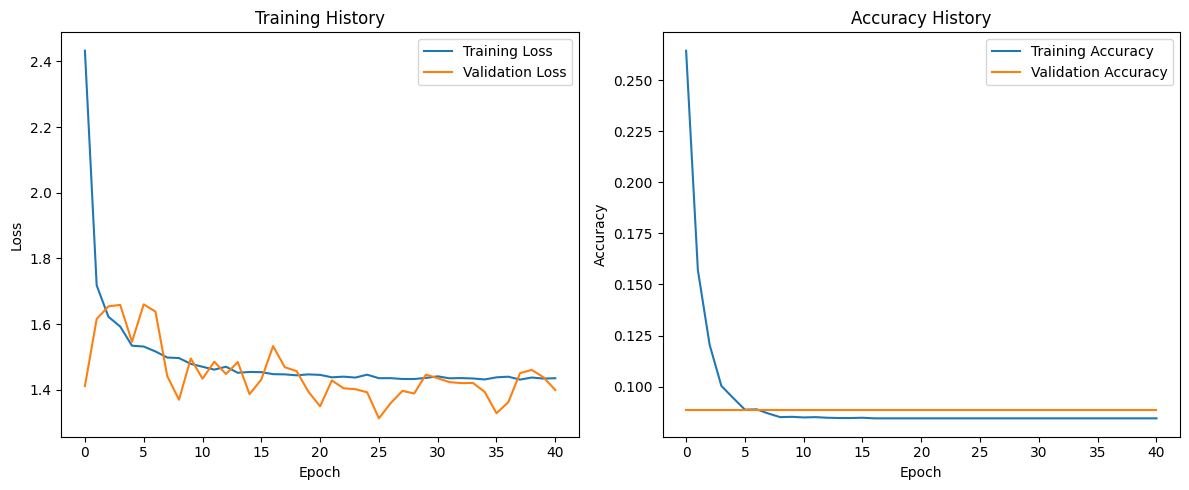

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <Sequential name=sequential, built=True> does not.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load and preprocess data
df = synthetic_data_gauss.copy()

# Map risk levels to ordinal values
risk_map = {'LOW': 0, 'INTERMEDIARY': 1, 'HIGH': 2}
df['CVD_RISK'] = df['CVD RISK'].map(risk_map)

# Feature engineering
df['SMOKING'] = df['SMOKING'].map({'Y': 1, 'N': 0})
df['SEX'] = df['SEX'].map({'M': 1, 'F': 0})

# Prepare features and target
X = df.drop(['CVD RISK', 'CVD_RISK'], axis=1, errors='ignore')  # Handle both column names
y = df['CVD_RISK']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)

# Convert to dense array if sparse
if isinstance(X_processed, np.ndarray):
    X_dense = X_processed
else:
    X_dense = X_processed.toarray()

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_dense, y, test_size=0.2, random_state=42, stratify=y
)

# Convert labels to one-hot encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Build DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    
    Dense(3, activation='softmax')
])

# Custom weighted loss function to handle class imbalance
def weighted_categorical_crossentropy(weights):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, dtype=tf.float32)
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
        loss = -tf.reduce_sum(weights * y_true * tf.math.log(y_pred), axis=-1)
        return loss
    return loss

# Calculate class weights
class_counts = y.value_counts()
total_samples = class_counts.sum()
class_weights = {i: total_samples / (3 * count) for i, count in enumerate(class_counts)}
loss_weights = [class_weights[i] for i in range(3)]

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=weighted_categorical_crossentropy(loss_weights),
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                       tf.keras.metrics.AUC(name='auc')])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train_encoded,
    validation_split=0.15,
    epochs=200,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weights
)

# Evaluate model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=list(risk_map.keys())))

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance analysis (using permutation)
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test_encoded, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False)
plt.yticks(range(len(sorted_idx)), [preprocessor.get_feature_names_out()[i] for i in sorted_idx])
plt.title("Permutation Importance")
plt.tight_layout()
plt.show()